# [OpenCV-Python Tutorial] Feature Matching

In this notebook, we will see how to extract SIFT(Scale-Invariant Feature Transform) and match SIFT features of two images with OpenCV-Python.

---

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import time

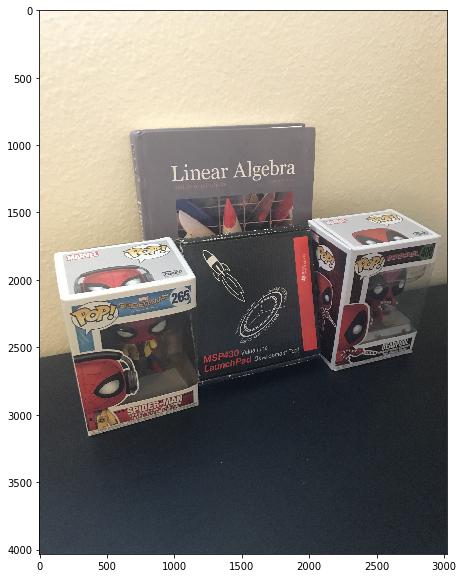

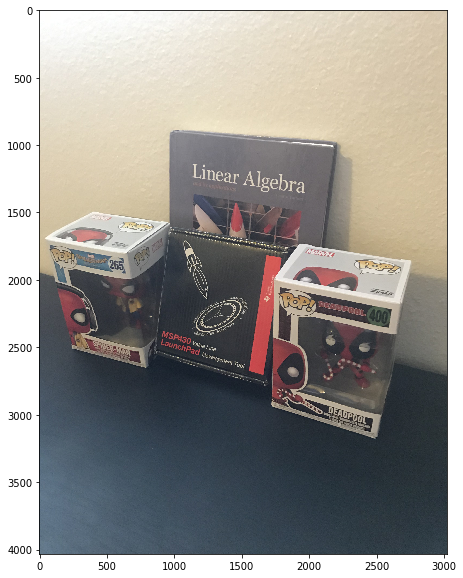

In [3]:
# Load an image
imageL = cv2.imread('images/toysL.jpeg')
imageR = cv2.imread('images/toysR.jpeg')

#Set the figure sizes and display the images
plt.rcParams['figure.figsize'] = [10,10] 
plt.imshow(cv2.cvtColor(imageL, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(imageR, cv2.COLOR_BGR2RGB))
plt.show()

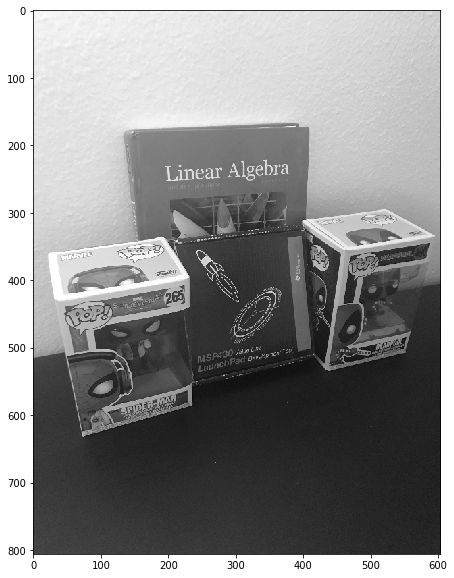

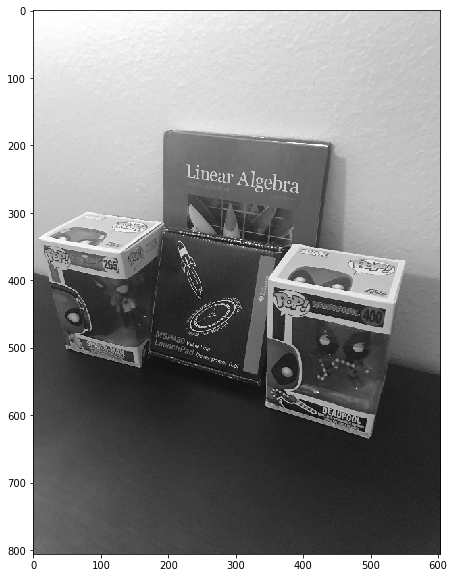

In [5]:
 # convert to grayscale, resize
imageL = cv2.cvtColor(imageL,cv2.COLOR_RGB2BGR)
grayL= cv2.cvtColor(imageL,cv2.COLOR_BGR2GRAY)
dim = (0.2*np.asarray(grayL.shape)).astype(int)
imageLs = cv2.resize(imageL,(dim[1],dim[0]))
grayL = cv2.resize(grayL,(dim[1],dim[0]))

imageR = cv2.cvtColor(imageR,cv2.COLOR_RGB2BGR)
grayR= cv2.cvtColor(imageR,cv2.COLOR_BGR2GRAY)
dim = (0.2*np.asarray(grayR.shape)).astype(int)
imageRs = cv2.resize(imageR,(dim[1],dim[0]))
grayR = cv2.resize(grayR,(dim[1],dim[0]))
plt.rcParams['figure.figsize'] = [10,10] 
plt.imshow(grayL, cmap="gray")
plt.show()
plt.imshow(grayR, cmap="gray")
plt.show()

In [6]:
# Members of cv2.xfeatures2d
dir(cv2.xfeatures2d)

['BoostDesc_create',
 'BriefDescriptorExtractor_create',
 'DAISY_NRM_FULL',
 'DAISY_NRM_NONE',
 'DAISY_NRM_PARTIAL',
 'DAISY_NRM_SIFT',
 'DAISY_create',
 'FREAK_NB_ORIENPAIRS',
 'FREAK_NB_PAIRS',
 'FREAK_NB_SCALES',
 'FREAK_create',
 'HarrisLaplaceFeatureDetector_create',
 'LATCH_create',
 'LUCID_create',
 'PCTSIGNATURES_GAUSSIAN',
 'PCTSIGNATURES_HEURISTIC',
 'PCTSIGNATURES_L0_25',
 'PCTSIGNATURES_L0_5',
 'PCTSIGNATURES_L1',
 'PCTSIGNATURES_L2',
 'PCTSIGNATURES_L2SQUARED',
 'PCTSIGNATURES_L5',
 'PCTSIGNATURES_L_INFINITY',
 'PCTSIGNATURES_MINUS',
 'PCTSIGNATURES_NORMAL',
 'PCTSIGNATURES_REGULAR',
 'PCTSIGNATURES_UNIFORM',
 'PCTSignaturesSQFD_create',
 'PCTSignatures_GAUSSIAN',
 'PCTSignatures_HEURISTIC',
 'PCTSignatures_L0_25',
 'PCTSignatures_L0_5',
 'PCTSignatures_L1',
 'PCTSignatures_L2',
 'PCTSignatures_L2SQUARED',
 'PCTSignatures_L5',
 'PCTSignatures_L_INFINITY',
 'PCTSignatures_MINUS',
 'PCTSignatures_NORMAL',
 'PCTSignatures_REGULAR',
 'PCTSignatures_UNIFORM',
 'PCTSignatures_cr

# Extract SIFT features from an image

## 1. SIFT detector

(806, 604, 3) => (806, 604)


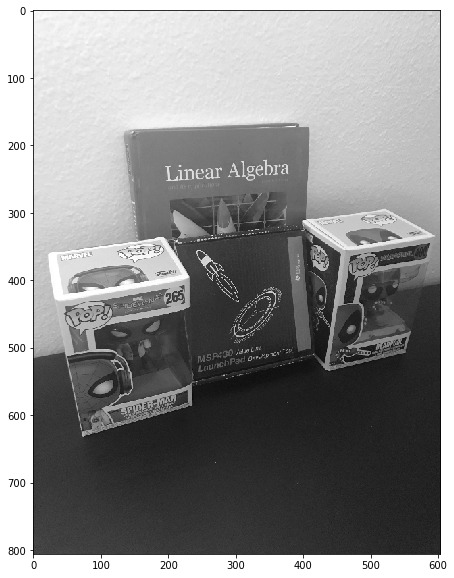

In [7]:
# Convert image color(BGR->Grayscale)
gray = cv2.cvtColor(imageLs, cv2.COLOR_BGR2GRAY)
# You can convert the image when calling cv2.imread()
# gray = cv2.imread('images/beaver.png', cv2.IMREAD_GRAYSCALE)

print(str(imageLs.shape) + " => " + str(grayL.shape))
plt.imshow(gray, cmap='gray')

In [8]:
# SIFT feature detector/descriptor
sift = cv2.xfeatures2d.SIFT_create()

In [9]:
# SIFT feature detection
start_time = time.time()
# kp = sift.detect(gray, None) # 2nd pos argument is a mask indicating a part of image to be searched in
kp = sift.detect(grayL, None) # 2nd pos argument is a mask indicating a part of image to be searched in
print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.170276s


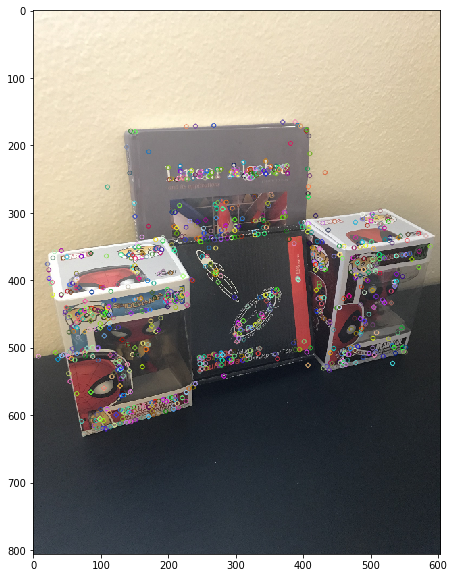

In [10]:
# Display the SIFT features
imageL_sift = cv2.drawKeypoints(imageLs, kp, None)
plt.imshow(cv2.cvtColor(imageL_sift, cv2.COLOR_BGR2RGB))

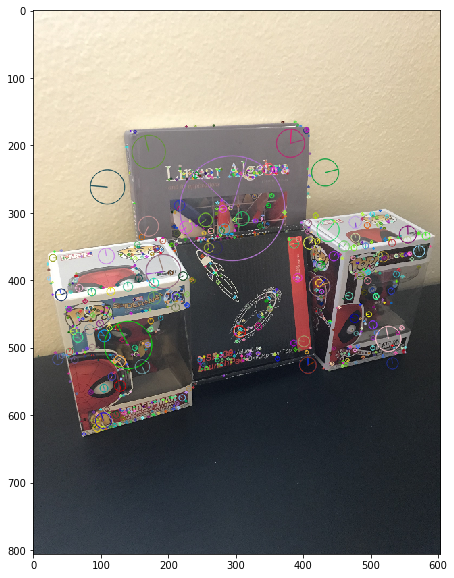

In [11]:
# Display the rich SIFT features
imageL_Rich_sift = cv2.drawKeypoints(imageLs, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(imageL_Rich_sift, cv2.COLOR_BGR2RGB))

In [12]:
# Inspect the keypoints
print (type(kp))
print (len(kp))

<class 'list'>
980


In [13]:
print (type(kp[0]))
print (dir(kp[0]))

<class 'cv2.KeyPoint'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


In [14]:
# A keypoint's property
# kp is sorted by scale of the keypoints
print(kp[-1].angle) # Orientation
print(kp[-1].class_id)
print(kp[-1].octave)
print(kp[-1].pt) # Position
print(kp[-1].response)
print(kp[-1].size )# Scale

12.514617919921875
-1
6292223
(587.5719604492188, 349.2808532714844)
0.024178912863135338
2.468858480453491


# Feature Matching

## 1. SIFT Feature Matching

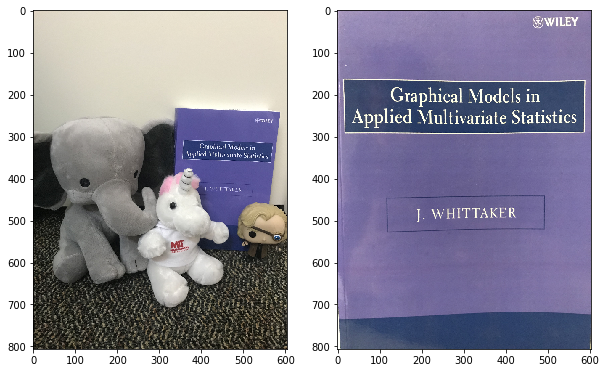

In [17]:
# Open and show images
scale = 0.2
img1 = cv2.imread('images/htoysL.jpeg')
height, width = img1.shape[0:2]
height, width = int(scale*height), int(scale*width)
img1 = cv2.resize(img1,(width, height))
img2 = cv2.imread('images/htoysZ.jpeg')
height, width = img2.shape[0:2]
height, width = int(scale*height), int(scale*width)
img2 = cv2.resize(img2,(width, height))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [18]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Elapsed time: 0.434657s
Image 1 - 3658 feature detected
Image 2 - 781 feature detected


In [19]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

3658 matches


In [20]:
# Inspect matcher results
print(type(matches))
print(len(matches))
print(type(matches[0]))
print(len(matches[0]))

<class 'list'>
3658
<class 'list'>
2


In [21]:
print(type(matches[0][0]))
print(dir(matches[0][0]))

<class 'cv2.DMatch'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


In [22]:
print(matches[0][0].distance)
print(matches[0][0].queryIdx)
print(matches[0][0].trainIdx)
print(matches[0][0].imgIdx)
print(matches[0][1].distance)
print(matches[0][1].queryIdx)
print(matches[0][1].trainIdx)
print(matches[0][1].imgIdx)

339.30810546875
0
517
0
360.5745544433594
0
366
0


In [23]:
# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

49 matches


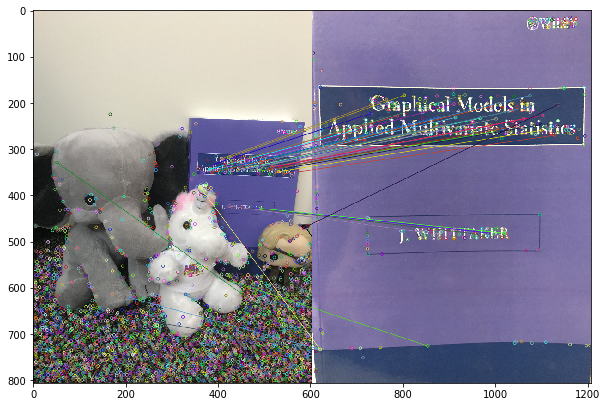

In [24]:
# Display matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

## 2. SIFT Mathing with Hellinger Distance

In [25]:
# L1 normalization
des1 = des1 / np.repeat(np.sum(des1, axis = 1).reshape(des1.shape[0], 1), des1.shape[1], axis=1)
des2 = des2 / np.repeat(np.sum(des2, axis = 1).reshape(des2.shape[0], 1), des2.shape[1], axis=1)

# Calculate Hellinger distance for every feature pair
dist_mat = np.sqrt(1.0 - np.dot(np.sqrt(des1), np.sqrt(des2).transpose()))

# Match with ratio test
min_arg = np.argsort(dist_mat, axis=1)
good_matches = []
for i in range(dist_mat.shape[0]):
    m, n = min_arg[i][0:2]
    if dist_mat[i][m] < dist_mat[i][n] * 0.75:
        dmatch = cv2.DMatch(i, m, 0, dist_mat[i][m]) # _queryIdx, _trainIdx, _imgIdx, _distance
        good_matches.append(dmatch)

print('%d matches' % len(good_matches))

46 matches


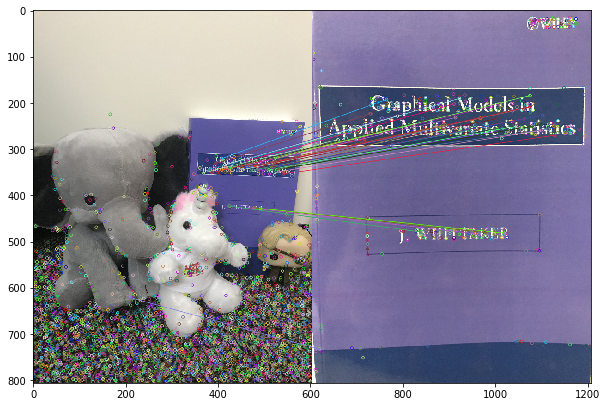

In [26]:
img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))